In [212]:
from sklearn import cluster, datasets,metrics

## Start Data processing

In [213]:
import pandas as pd

# This time, try input data w/ 'iris.csv' file.
iris = pd.read_csv("iris.csv") 
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [214]:
# You cannot use attribute 'data', cuz 'data' is only from the dataset in sklearn.
# iris_X = iris.data
# iris_X

### Preparing X (training data)

In [215]:
# Instead of 'data', you can try list it yourself.
iris_X = iris.iloc[:,0:4]
print(iris_X.head())

# Turn it into array for later use.
iris_X = iris.iloc[:,0:4].values

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


### Preparing y (testing data)

In [216]:
# Processing "Target".
iris_y = iris.iloc[:, 4]

iris_label_mapping = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

iris['class'] = iris['class'].map(iris_label_mapping)
iris.head()

iris_y = iris['class'].values


## Creating Kmeans classifier

In [217]:
# Create K-means classifier.
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)

## Print Results

In [218]:
# Print all result.
cluster_labels = kmeans_fit.labels_
print("K-means classify result:")
print(cluster_labels)
print("---")

K-means classify result:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
---


In [219]:
# Print the regular result and compare.
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Print Accuracy

In [220]:
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5525919445499757


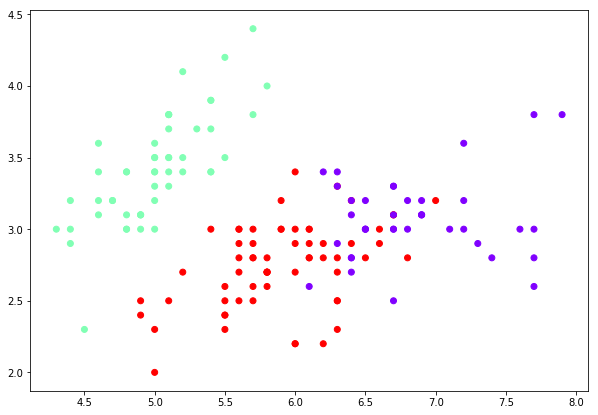

In [221]:
plt.figure(figsize=(10, 7))  
plt.scatter(iris_X[:,0], iris_X[:,1], c=cluster_labels, cmap='rainbow')

### Find the best 'k' value.

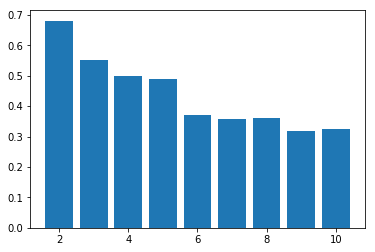

[0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.4885175508886279, 0.36935505701841964, 0.3578485209347742, 0.3614201865638655, 0.31939339363660757, 0.3251917963181853]


In [222]:
import matplotlib.pyplot as plt

silhouette_avgs=[]

ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

## Practice Time:
1. Practice using kmeans and sklearn datasets 'iris'.
2. Practice using dataset 'zoo.csv' for machine learning.